In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
print(x_train[0].shape)
print(x_train.shape)

(28, 28)
(60000, 28, 28)


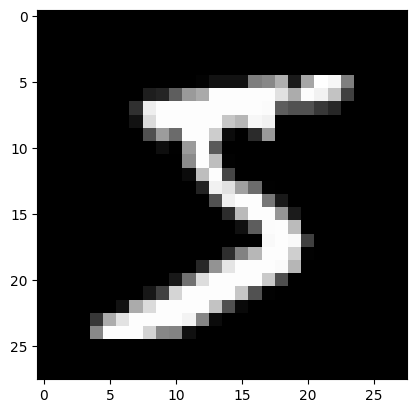

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [ ]:
x_train  = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

In [ ]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784))

In [ ]:
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics="mean_squared_error")

In [ ]:
model.fit(x=x_train,
         y=x_train,
         epochs=50,
         batch_size=1000,
         validation_data=(x_test, x_test))

Epoch 1/50
60/60 [==============================] - 1s 16ms/step - loss: 1269.3688 - mean_squared_error: 1269.3688 - val_loss: 1242.6718 - val_mean_squared_error: 1242.6718
Epoch 2/50
60/60 [==============================] - 1s 16ms/step - loss: 1261.4249 - mean_squared_error: 1261.4249 - val_loss: 1237.1488 - val_mean_squared_error: 1237.1488
Epoch 3/50
60/60 [==============================] - 1s 17ms/step - loss: 1253.5477 - mean_squared_error: 1253.5477 - val_loss: 1227.7928 - val_mean_squared_error: 1227.7928
Epoch 4/50
60/60 [==============================] - 1s 18ms/step - loss: 1246.0298 - mean_squared_error: 1246.0298 - val_loss: 1221.1936 - val_mean_squared_error: 1221.1936
Epoch 5/50
60/60 [==============================] - 1s 17ms/step - loss: 1238.8789 - mean_squared_error: 1238.8789 - val_loss: 1216.1469 - val_mean_squared_error: 1216.1469
Epoch 6/50
60/60 [==============================] - 1s 17ms/step - loss: 1231.9017 - mean_squared_error: 1231.9017 - val_loss: 1208.219

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in model.layers:
    print(i)

### Encoder

In [ ]:
encoder = Sequential()
for layer in model.layers[:2]:
    encoder.add(layer)

In [ ]:
encoder.build(input_shape=(None, 784))
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
Total params: 104,608
Trainable params: 104,608
Non-trainable params: 0
_________________________________________________________________


### Decoder

In [ ]:
decoder = Sequential()
for layer in model.layers[2:]:
    decoder.add(layer)

In [ ]:
decoder.build(input_shape=(None, 32))
decoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________________________


## Example Test

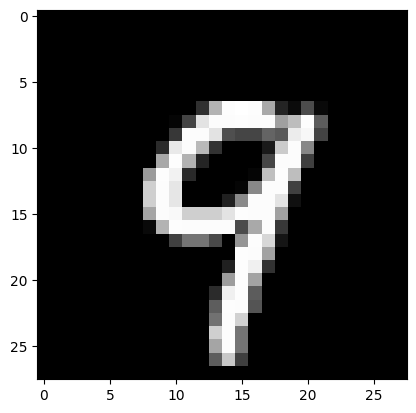

In [ ]:
plt.imshow(x_test[12].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
code = encoder.predict(x_test) # Compressed representation

In [ ]:
code[12].shape

(32,)

In [ ]:
recon = decoder.predict(code)

In [ ]:
recon[12].shape

(784,)

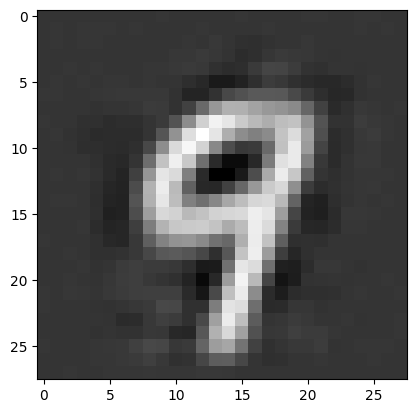

In [ ]:
plt.imshow(recon[12].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
32/784

0.04081632653061224